Objective:
1. Set up the optimisation problem of 10 JSE stocks
2. Plot the efficient frontier and the composition of efficient portfolio on seperate diagrams

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

In [106]:
# importing the stock prices from multiple files and merging to one csv - STOCK PRICES

#def TotalStocks(folder_name):
folder = "Stocks"
files = os.scandir(folder)

STOCK_LIST = []

with os.scandir(folder) as files:
    for file in files:
        df = pd.read_csv(file, index_col=None)
        dist = {file: (df['Price'])}
        stock = pd.DataFrame(dist)
        STOCK_LIST.append(stock)

# create dataframe from combining each stock price
df = pd.concat(STOCK_LIST, ignore_index=False, axis=1)
df.head()

#return df



# rename columns
colunm_headings = ["Aveng", "Anglo", "Exxaro", "KIO", "Mr Price", "MTN", "RMB holdings", "Shoprite", "Santam", "Sasol"]
for i in range(0, len(df.columns)):
    df.rename(columns={df.columns[i]:colunm_headings[i]}, inplace=True)

# convert numbers to float
for stock_name in df.columns:
    df[stock_name] = df[stock_name].str.replace(',', '').astype(float)

print(df)

# check missing data
df.isnull().sum()

# output csv
df.to_csv('STOCK PRICES.csv', index=True)


          Aveng       Anglo      Exxaro         KIO    Mr Price         MTN  \
0      248.0000 15,723.0000  7,308.0000 13,732.0000 16,294.0000 11,848.0000   
1      270.0000 15,910.0000  7,191.0000 13,401.0000 15,856.0000 11,681.0000   
2      276.0000 16,139.0000  7,001.0000 13,823.0000 15,915.0000 11,670.0000   
3      270.0000 15,722.0000  6,953.0000 13,250.0000 15,701.0000 11,566.0000   
4      274.0000 15,119.0000  6,813.0000 12,525.0000 15,930.0000 11,900.0000   
...         ...         ...         ...         ...         ...         ...   
1495 1,620.0000 55,155.0000 21,832.0000 38,051.0000 18,622.0000 12,425.0000   
1496 1,637.0000 53,257.0000 21,401.0000 37,458.0000 18,767.0000 12,618.0000   
1497 1,648.0000 54,834.0000 21,916.0000 37,935.0000 19,214.0000 12,649.0000   
1498 1,610.0000 55,019.0000 22,100.0000 38,782.0000 19,327.0000 12,841.0000   
1499 1,608.0000 55,750.0000 22,345.0000 37,963.0000 19,500.0000 13,024.0000   

      RMB holdings    Shoprite      Santam       Sa

In [107]:
# plotting the Total return
# add date column
dates = pd.read_csv('Stocks/AEGJ Historical Data-aveng.csv', usecols= ['Date'])
df_with_dates = df.assign(Dates=dates)
df_with_dates = df_with_dates[["Dates", "Aveng", "Anglo", "Exxaro", "KIO", "Mr Price", "MTN", "RMB holdings", "Shoprite", "Santam", "Sasol"]]

print(df_with_dates)

          Dates      Aveng       Anglo      Exxaro         KIO    Mr Price  \
0      7-Sep-16   248.0000 15,723.0000  7,308.0000 13,732.0000 16,294.0000   
1      8-Sep-16   270.0000 15,910.0000  7,191.0000 13,401.0000 15,856.0000   
2      9-Sep-16   276.0000 16,139.0000  7,001.0000 13,823.0000 15,915.0000   
3     12-Sep-16   270.0000 15,722.0000  6,953.0000 13,250.0000 15,701.0000   
4     13-Sep-16   274.0000 15,119.0000  6,813.0000 12,525.0000 15,930.0000   
...         ...        ...         ...         ...         ...         ...   
1495  31-Aug-22 1,620.0000 55,155.0000 21,832.0000 38,051.0000 18,622.0000   
1496   1-Sep-22 1,637.0000 53,257.0000 21,401.0000 37,458.0000 18,767.0000   
1497   2-Sep-22 1,648.0000 54,834.0000 21,916.0000 37,935.0000 19,214.0000   
1498   5-Sep-22 1,610.0000 55,019.0000 22,100.0000 38,782.0000 19,327.0000   
1499   6-Sep-22 1,608.0000 55,750.0000 22,345.0000 37,963.0000 19,500.0000   

             MTN  RMB holdings    Shoprite      Santam       Sa

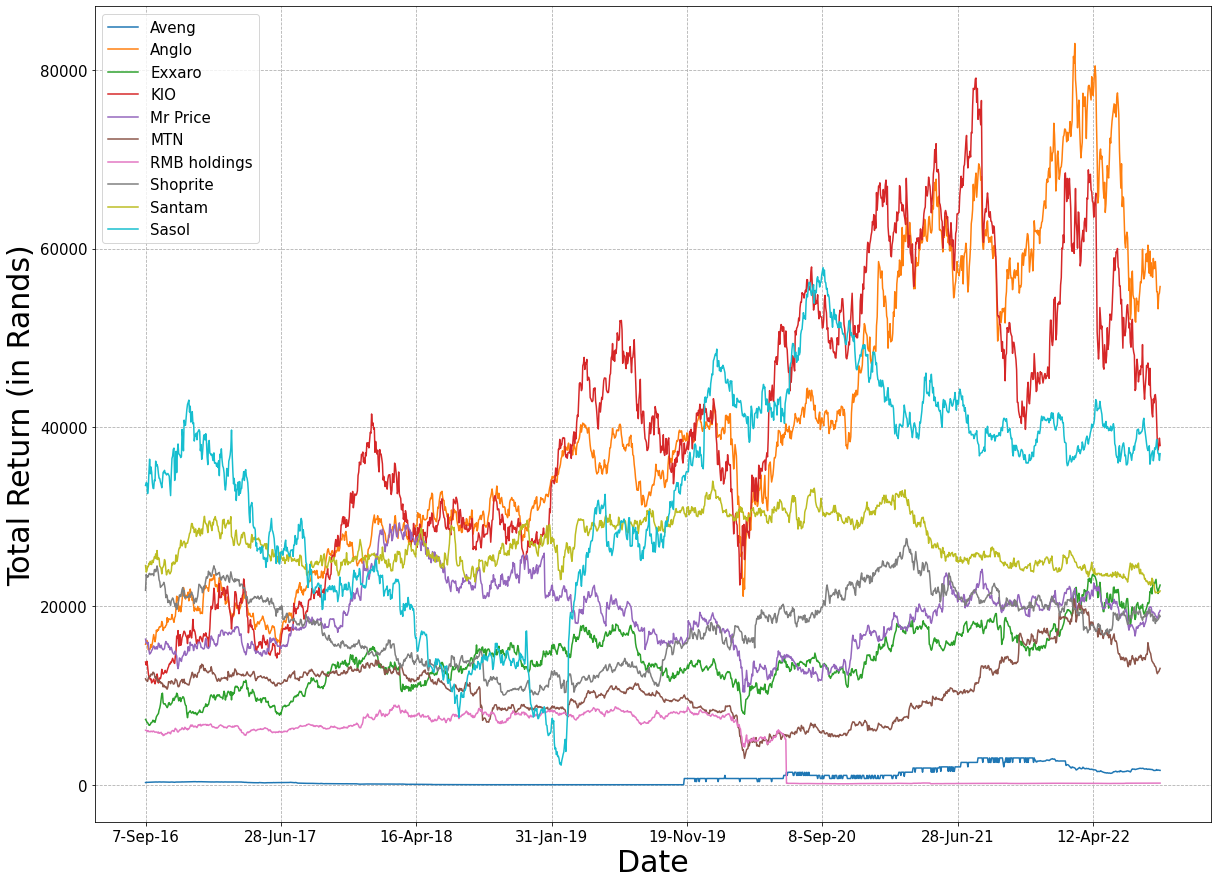

In [108]:
# plotting Total Returns time series
df_with_dates[df_with_dates.columns].plot(x = "Dates",
                    figsize=(20,15),
                    fontsize=15)

#plt.style.use("seaborn-whitegrid")
plt.xlabel("Date", size=30)
plt.ylabel("Total Return (in Rands)", size=30)
plt.grid('on', which='both', linestyle="--")
plt.legend(loc=2, prop={'size':15}, frameon=True)
plt.show()


In [109]:
# calculating daily return

df_returns = (df/df.shift(1))-1
df_returns

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0887,0.0119,-0.0160,-0.0241,-0.0269,-0.0141,0.0010,0.0810,-0.0298,0.0095
2,0.0222,0.0144,-0.0264,0.0315,0.0037,-0.0009,-0.0098,-0.0137,0.0063,-0.0019
3,-0.0217,-0.0258,-0.0069,-0.0415,-0.0134,-0.0089,-0.0147,0.0067,0.0196,-0.0346
4,0.0148,-0.0384,-0.0201,-0.0547,0.0146,0.0289,0.0161,-0.0037,-0.0008,0.0186
...,...,...,...,...,...,...,...,...,...,...
1495,-0.0471,-0.0005,-0.0112,-0.0588,-0.0074,-0.0163,-0.0110,0.0045,-0.0023,-0.0266
1496,0.0105,-0.0344,-0.0197,-0.0156,0.0078,0.0155,0.0000,0.0052,0.0024,-0.0145
1497,0.0067,0.0296,0.0241,0.0127,0.0238,0.0025,0.0111,0.0056,0.0022,-0.0012
1498,-0.0231,0.0034,0.0084,0.0223,0.0059,0.0152,0.0000,0.0215,-0.0016,-0.0200


In [110]:
# Calculating Average Returns

E = df_returns.mean()
E

Aveng           0.4803
Anglo           0.0011
Exxaro          0.0011
KIO             0.0012
Mr Price        0.0004
MTN             0.0004
RMB holdings   -0.0004
Shoprite        0.0001
Santam          0.0001
Sasol           0.0009
dtype: float64

In [111]:
log_returns = np.log(df_returns)
log_returns

C:\Users\RozinaLucy.Myoya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\RozinaLucy.Myoya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.4224,-4.4318,NaN,NaN,NaN,NaN,-6.9233,-2.5138,NaN,-4.6571
2,-3.8067,-4.2410,NaN,-3.4581,-5.5938,NaN,NaN,NaN,-5.0668,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0022,-3.9331,NaN
4,-4.2121,NaN,NaN,NaN,-4.2278,-3.5447,-4.1270,NaN,NaN,-3.9862
...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.3967,NaN,NaN
1496,-4.5570,NaN,NaN,NaN,-4.8554,-4.1648,-inf,-5.2558,-6.0431,NaN
1497,-5.0027,-3.5196,-3.7270,-4.3635,-3.7373,-6.0089,-4.4998,-5.1809,-6.1061,NaN
1498,NaN,-5.6917,-4.7800,-3.8019,-5.1360,-4.1878,-inf,-3.8395,NaN,NaN


In [112]:
# Calulating Covariance matrix

Cov_log = log_returns.cov()
Cov_log

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
Aveng,3.3476,-0.1175,0.1085,-0.0719,0.0380,0.2732,0.2215,0.2073,0.0351,0.1612
Anglo,-0.1175,1.1560,0.2364,0.3015,0.0531,0.2138,0.1448,-0.0034,0.0508,-0.0231
Exxaro,0.1085,0.2364,1.0911,0.3131,0.1093,0.0915,0.0683,0.0315,0.0597,0.0984
KIO,-0.0719,0.3015,0.3131,1.5078,0.1161,0.0693,0.1244,0.1121,0.0268,-0.0533
Mr Price,0.0380,0.0531,0.1093,0.1161,1.3371,0.1959,0.2973,0.0194,0.0026,0.0043
MTN,0.2732,0.2138,0.0915,0.0693,0.1959,1.5452,0.2792,0.0117,-0.0527,0.0624
RMB holdings,0.2215,0.1448,0.0683,0.1244,0.2973,0.2792,0.9632,0.0510,0.0926,-0.0014
Shoprite,0.2073,-0.0034,0.0315,0.1121,0.0194,0.0117,0.0510,1.1730,0.1541,0.1114
Santam,0.0351,0.0508,0.0597,0.0268,0.0026,-0.0527,0.0926,0.1541,1.6086,0.0627
Sasol,0.1612,-0.0231,0.0984,-0.0533,0.0043,0.0624,-0.0014,0.1114,0.0627,1.6074


In [113]:
# Calulating Covariance matrix

Cov = df_returns.cov()
Cov

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
Aveng,324.1176,0.0047,0.0174,0.0173,0.0036,0.0073,-0.0104,-0.0010,-0.0076,-0.0001
Anglo,0.0047,0.0006,0.0003,0.0004,0.0001,0.0002,0.0001,0.0000,0.0000,-0.0000
Exxaro,0.0174,0.0003,0.0007,0.0004,0.0001,0.0001,0.0002,0.0000,0.0000,0.0000
KIO,0.0173,0.0004,0.0004,0.0010,0.0001,0.0001,0.0001,0.0000,0.0000,0.0000
Mr Price,0.0036,0.0001,0.0001,0.0001,0.0006,0.0002,0.0002,0.0000,0.0000,-0.0000
MTN,0.0073,0.0002,0.0001,0.0001,0.0002,0.0008,0.0002,0.0000,0.0000,0.0001
RMB holdings,-0.0104,0.0001,0.0002,0.0001,0.0002,0.0002,0.0012,0.0000,0.0000,-0.0000
Shoprite,-0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0001,0.0001
Santam,-0.0076,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003,0.0001
Sasol,-0.0001,-0.0000,0.0000,0.0000,-0.0000,0.0001,-0.0000,0.0001,0.0001,0.0019


In [114]:
# Setting up variables
returns = df_returns #log_returns
average_return = E 
covariance = Cov # Cov_log
no_Stocks = len(df_returns.columns)
no_Portfolios = 10000
target_returns = np.linspace(0.000, 0.005, 20) # 


In [115]:
# Find efficient frontier given target retruns

volatility_opt = []
weights = []


def checkSumToOne(w):
    return np.sum(w)-1


def minimiseMyV(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    return V


def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R


w0 = np.zeros(no_Stocks)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

for R in target_returns:
    # find opt volatility
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun': lambda w:getReturn(w) - R})
    opt = minimize(minimiseMyV,w0, method ='SLSQP', bounds = bounds, constraints=constraints)
    
    # save my optimal volatiliy
    volatility_opt.append(opt['fun'])
    weights.append(opt.x)

In [116]:
# creating a df of the weights and corresponding stocks

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
df_weights = pd.DataFrame(weights)
   

colunm_headings = ["Aveng", "Anglo", "Exxaro", "KIO", "Mr Price", "MTN", "RMB holdings", "Shoprite", "Santam", "Sasol"]
for i in range(0, len(df_weights.columns)):
    df_weights.rename(columns={df_weights.columns[i]:colunm_headings[i]}, inplace=True)

df_weights

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
0,0.0000,0.0000,0.0000,0.0000,0.0467,0.0108,0.2011,0.2387,0.5028,0.0000
1,0.0000,0.0823,0.0498,0.0008,0.1273,0.0533,0.0659,0.2127,0.3866,0.0213
2,0.0001,0.1727,0.1063,0.0155,0.1324,0.0436,0.0000,0.1786,0.2957,0.0551
3,0.0002,0.2753,0.1567,0.0300,0.1153,0.0266,0.0000,0.1161,0.1871,0.0926
4,0.0004,0.3691,0.2223,0.0444,0.0934,0.0016,0.0000,0.0600,0.0769,0.1320
5,0.0005,0.4633,0.2712,0.0670,0.0309,0.0000,0.0000,0.0000,0.0000,0.1671
6,0.0010,0.5068,0.2502,0.0940,0.0000,0.0000,0.0000,0.0000,0.0000,0.1480
7,0.0015,0.5391,0.2056,0.1278,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
8,0.0021,0.5704,0.1574,0.1669,0.0000,0.0000,0.0000,0.0000,0.0000,0.1032
9,0.0026,0.5958,0.1089,0.2111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0817


In [117]:
# creating a df of the variance calculated given target returns 
pd.options.display.float_format = '{:,.4f}'.format
df_opt = pd.DataFrame()
df_opt["Volatility"] = volatility_opt
df_opt["Expected Return"] = target_returns

frames = [df_opt, df_weights]

result = pd.concat(frames, axis=1)
perc_result = result*100
perc_result

,Volatility,Expected Return,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol
0,1.3235,0.0000,0.0000,0.0000,0.0000,0.0000,4.6651,1.0828,20.1065,23.8690,50.2767,0.0000
1,1.1220,0.0263,0.0000,8.2301,4.9773,0.0803,12.7258,5.3331,6.5883,21.2748,38.6603,2.1300
2,1.1536,0.0526,0.0075,17.2669,10.6343,1.5458,13.2436,4.3591,0.0000,17.8582,29.5701,5.5145
3,1.3684,0.0789,0.0218,27.5335,15.6732,2.9980,11.5281,2.6636,0.0000,11.6104,18.7089,9.2626
4,1.7127,0.1053,0.0354,36.9133,22.2268,4.4402,9.3398,0.1569,0.0000,5.9970,7.6891,13.2016
5,2.1274,0.1316,0.0524,46.3301,27.1160,6.6991,3.0948,0.0000,0.0000,0.0000,0.0000,16.7076
6,2.6982,0.1579,0.1015,50.6757,25.0191,9.4004,0.0000,0.0000,0.0000,0.0000,0.0000,14.8033
7,3.4526,0.1842,0.1549,53.9086,20.5572,12.7822,0.0000,0.0000,0.0000,0.0000,0.0000,12.5970
8,4.2967,0.2105,0.2082,57.0424,15.7398,16.6915,0.0000,0.0000,0.0000,0.0000,0.0000,10.3180
9,5.1870,0.2368,0.2615,59.5793,10.8858,21.1081,0.0000,0.0000,0.0000,0.0000,0.0000,8.1653


In [118]:
# Finding the index of the point with min var
index_min_var = df_opt["Volatility"].argmin()


In [119]:
# var at MVP
opt_var = volatility_opt[index_min_var]*100
opt_var

1.1220183205894785

In [120]:
# Return at MVP
opt_R = np.sum(weights[index_min_var]*E)*100
opt_R

0.02631578947372824

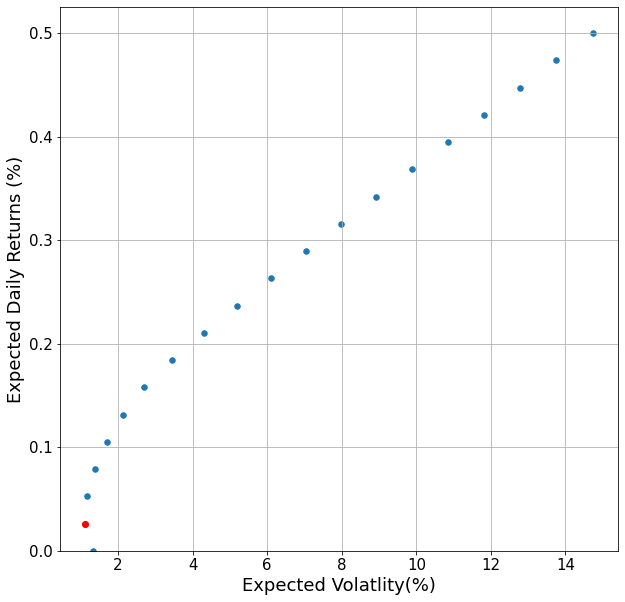

In [121]:
perc_result.plot.scatter(x = "Volatility", y = "Expected Return", s=30, grid=True, figsize=[10,10], fontsize=15)
plt.scatter(opt_var, opt_R, c='red')
plt.xlabel("Expected Volatlity(%)", size=18)
plt.ylabel("Expected Daily Returns (%)", size=18)
plt.ylim(ymin = 0)
plt.show()

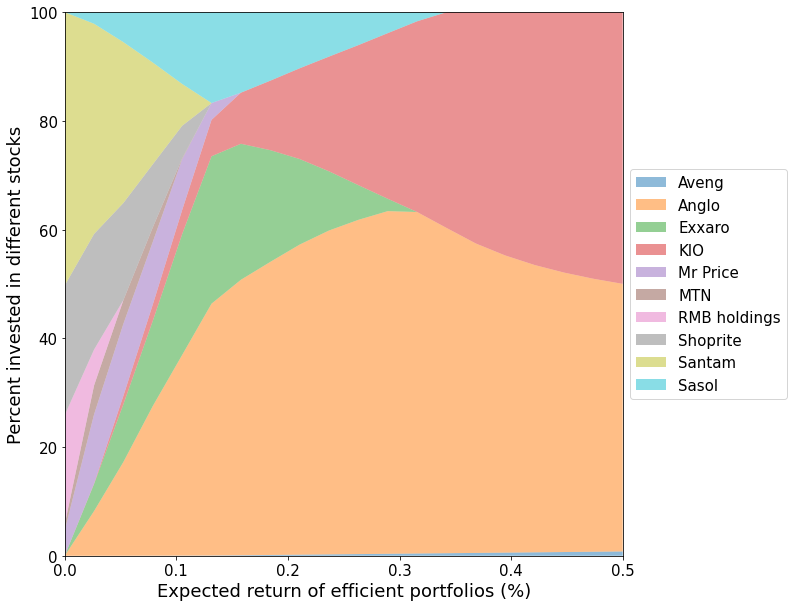

In [122]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,10))
plt.stackplot(perc_result["Expected Return"],perc_result["Aveng"], perc_result["Anglo"], 
                perc_result["Exxaro"], perc_result["KIO"], perc_result["Mr Price"], 
                perc_result["MTN"], perc_result["RMB holdings"], perc_result["Shoprite"], 
                perc_result["Santam"], perc_result["Sasol"],
                alpha = 0.5, 
                labels= ["Aveng", "Anglo", "Exxaro", "KIO", "Mr Price", "MTN", "RMB holdings", "Shoprite", "Santam", "Sasol"])
plt.xlabel("Expected return of efficient portfolios (%)",size=18)
plt.ylabel("Percent invested in different stocks",size=18)
plt.xlim(xmin = 0, xmax = 0.5)
plt.ylim(ymax = 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

PART 2

Exercise 8.6

In [123]:
# CAPM

# High-beta tocks are supposed to be riskier, but provide (potentially) higher returns
# Low-beta stocks poses less risk but also lower returns

# Using the FNB Top40 ETFs as an indice to the overall market performance.

#Beta = Cov/Variance

# Beta > 1 means the stock is more volatile than the market, but expects higher returns
# Beta < 1 means the stock has lower volatility and lower returns are expected

FNBT40 = pd.read_csv('FNBT40J Historical Data.csv', usecols= ['Price'])
df["FNBT40"] = FNBT40
df

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol,FNBT40
0,248.0000,"15,723.0000","7,308.0000","13,732.0000","16,294.0000","11,848.0000","6,094.0000","21,763.0000","24,530.0000","33,494.0000",4707
1,270.0000,"15,910.0000","7,191.0000","13,401.0000","15,856.0000","11,681.0000","6,100.0000","23,525.0000","23,800.0000","33,812.0000",4690
2,276.0000,"16,139.0000","7,001.0000","13,823.0000","15,915.0000","11,670.0000","6,040.0000","23,203.0000","23,950.0000","33,747.0000",4712
3,270.0000,"15,722.0000","6,953.0000","13,250.0000","15,701.0000","11,566.0000","5,951.0000","23,359.0000","24,419.0000","32,578.0000",4659
4,274.0000,"15,119.0000","6,813.0000","12,525.0000","15,930.0000","11,900.0000","6,047.0000","23,272.0000","24,400.0000","33,183.0000",4664
...,...,...,...,...,...,...,...,...,...,...,...
1495,"1,620.0000","55,155.0000","21,832.0000","38,051.0000","18,622.0000","12,425.0000",180.0000,"18,400.0000","21,482.0000","37,620.0000",6143
1496,"1,637.0000","53,257.0000","21,401.0000","37,458.0000","18,767.0000","12,618.0000",180.0000,"18,496.0000","21,533.0000","37,075.0000",5997
1497,"1,648.0000","54,834.0000","21,916.0000","37,935.0000","19,214.0000","12,649.0000",182.0000,"18,600.0000","21,581.0000","37,030.0000",6146
1498,"1,610.0000","55,019.0000","22,100.0000","38,782.0000","19,327.0000","12,841.0000",182.0000,"19,000.0000","21,547.0000","36,291.0000",6151


In [124]:
df_retruns_CAPM = (df/df.shift(1))-1
df_retruns_CAPM

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol,FNBT40
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0887,0.0119,-0.0160,-0.0241,-0.0269,-0.0141,0.0010,0.0810,-0.0298,0.0095,-0.0036
2,0.0222,0.0144,-0.0264,0.0315,0.0037,-0.0009,-0.0098,-0.0137,0.0063,-0.0019,0.0047
3,-0.0217,-0.0258,-0.0069,-0.0415,-0.0134,-0.0089,-0.0147,0.0067,0.0196,-0.0346,-0.0112
4,0.0148,-0.0384,-0.0201,-0.0547,0.0146,0.0289,0.0161,-0.0037,-0.0008,0.0186,0.0011
...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.0471,-0.0005,-0.0112,-0.0588,-0.0074,-0.0163,-0.0110,0.0045,-0.0023,-0.0266,-0.0036
1496,0.0105,-0.0344,-0.0197,-0.0156,0.0078,0.0155,0.0000,0.0052,0.0024,-0.0145,-0.0238
1497,0.0067,0.0296,0.0241,0.0127,0.0238,0.0025,0.0111,0.0056,0.0022,-0.0012,0.0248
1498,-0.0231,0.0034,0.0084,0.0223,0.0059,0.0152,0.0000,0.0215,-0.0016,-0.0200,0.0008


In [125]:
Cov_CAPM = df_retruns_CAPM.cov()
Cov_CAPM 

,Aveng,Anglo,Exxaro,KIO,Mr Price,MTN,RMB holdings,Shoprite,Santam,Sasol,FNBT40
Aveng,324.1176,0.0047,0.0174,0.0173,0.0036,0.0073,-0.0104,-0.0010,-0.0076,-0.0001,-0.0017
Anglo,0.0047,0.0006,0.0003,0.0004,0.0001,0.0002,0.0001,0.0000,0.0000,-0.0000,0.0002
Exxaro,0.0174,0.0003,0.0007,0.0004,0.0001,0.0001,0.0002,0.0000,0.0000,0.0000,0.0001
KIO,0.0173,0.0004,0.0004,0.0010,0.0001,0.0001,0.0001,0.0000,0.0000,0.0000,0.0002
Mr Price,0.0036,0.0001,0.0001,0.0001,0.0006,0.0002,0.0002,0.0000,0.0000,-0.0000,0.0001
MTN,0.0073,0.0002,0.0001,0.0001,0.0002,0.0008,0.0002,0.0000,0.0000,0.0001,0.0001
RMB holdings,-0.0104,0.0001,0.0002,0.0001,0.0002,0.0002,0.0012,0.0000,0.0000,-0.0000,0.0001
Shoprite,-0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0001,0.0001,-0.0000
Santam,-0.0076,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003,0.0001,0.0000
Sasol,-0.0001,-0.0000,0.0000,0.0000,-0.0000,0.0001,-0.0000,0.0001,0.0001,0.0019,-0.0000


In [126]:
var_CAPM = df_retruns_CAPM["FNBT40"].var()
var_CAPM

0.00026934396655690603

In [127]:
# Calculating Beta
pd.options.display.float_format = '{:,.4f}'.format
beta = Cov_CAPM.loc["FNBT40"]/var_CAPM
beta

Aveng          -6.3741
Anglo           0.7500
Exxaro          0.5453
KIO             0.6958
Mr Price        0.5264
MTN             0.5544
RMB holdings    0.5567
Shoprite       -0.0036
Santam          0.0212
Sasol          -0.0655
FNBT40          1.0000
Name: FNBT40, dtype: float64

In [128]:
beta = beta[:-1]
beta

Aveng          -6.3741
Anglo           0.7500
Exxaro          0.5453
KIO             0.6958
Mr Price        0.5264
MTN             0.5544
RMB holdings    0.5567
Shoprite       -0.0036
Santam          0.0212
Sasol          -0.0655
Name: FNBT40, dtype: float64

In [129]:
# CAPM

# Market risk premium

# Risk Free retrun - South Africa 10 Years Government Bond has a 10.370% yield = 0.1037 

# Market risk premium 

risk_free_asset = pd.read_csv('South Africa 10-Year Bond Yield Historical Data.csv', usecols= ['Price'])
df_risk_free = pd.DataFrame(risk_free_asset)
df_risk_free

,Price
0,8.6200
1,8.5950
2,8.7550
3,8.7250
4,8.7250
...,...
1540,10.5500
1541,10.3250
1542,10.3300
1543,10.5200


In [130]:
risk_free_return = (df_risk_free/df_risk_free.shift(1))-1
risk_free_return.mean()

Price   0.0002
dtype: float64

In [131]:
E

Aveng           0.4803
Anglo           0.0011
Exxaro          0.0011
KIO             0.0012
Mr Price        0.0004
MTN             0.0004
RMB holdings   -0.0004
Shoprite        0.0001
Santam          0.0001
Sasol           0.0009
dtype: float64

In [132]:
# Calculating the expected markert return ERM = Rf + beta(E - Rf)

ERM = risk_free_return.mean().values + beta * (E - risk_free_return.mean().values)

market_return = ERM.dropna()
market_return 

Aveng          -3.0603
Anglo           0.0009
Exxaro          0.0007
KIO             0.0009
Mr Price        0.0003
MTN             0.0003
RMB holdings   -0.0001
Shoprite        0.0002
Santam          0.0002
Sasol           0.0001
dtype: float64

-1*sum(w.beta) + 0.9 < 0

sum(w.beta) < 1.1

In [182]:
no_Stocks = len(market_return)
volatility_opt = []
weights = []


def minVar(w):
    w = np.array(w)
    opt_R = np.sum(E*w)
    market_beta = np.sum(beta*w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    
    return V

def checkSumToOne(w):
    return np.sum(w)-1

def checkMarketBetaMin(w):
    return np.sum(beta*w)*-1 + 0.9

def checkMarketBetaMax(w):
    return np.sum(beta*w) - 1.1

def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R
   

w0 = np.zeros(no_Stocks)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
for R in target_returns:
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                {'type':'eq', 'fun':checkMarketBetaMin},
                {'type':'eq', 'fun':checkMarketBetaMax},
                {'type':'eq', 'fun': lambda w:getReturn(w) - R})
    w_opt = minimize(minVar,w0,method ='SLSQP', bounds = bounds, constraints=constraints)
    w_opt

In [184]:
w_opt.x

array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000])

i)

In [183]:
beta_retrun = np.sum(w_opt.x*E)
beta_retrun

0.0

ii)
 large stocks = MTN, Sasol, Anglo, 
 medium stocks = Exxaro,  KIO, Mr Price, Shoprite, Santam
 small stocks = Aveng, RMB holdings
 
large stocks = medium stocks
small stocks <= 3 * large stocks  


In [181]:
no_Stocks = len(market_return)
small = [1,0,0,0,0,0,1,0,0,0]
medium= [0,0,1,1,1,0,0,1,1,0]
large = [0,1,0,0,0,1,0,0,0,1]
R = 0.0005

def minVar(w):
    w = np.array(w)
    opt_R = np.sum(E*w)
    market_beta = np.sum(beta*w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    return V

def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R

def checkSumToOne(w):
    return np.sum(w)-1

def checkMarketBetaMin(w):
    return np.sum(beta*w)*-1 + 0.9

def checkMarketBetaMax(w):
    return np.sum(beta*w) - 1.1

def checkSmallToLargeRatio(w):
    return np.dot(w,small) - 3*np.dot(w,large) 

def checkSmallToMedRatio(w):
    return np.dot(w,small) - 3*np.dot(w,medium) 

def checkMedToLargeRatio(w):
    return np.dot(w,medium) - np.dot(w,large)


w0 = np.zeros(no_Stocks)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
constraints = ({'type':'eq', 'fun':checkSumToOne},
               {'type':'eq', 'fun':checkMarketBetaMin},
               {'type':'eq', 'fun':checkMarketBetaMax},
               {'type':'eq', 'fun':checkMedToLargeRatio},
               {'type':'ineq', 'fun':checkSmallToLargeRatio},
               {'type':'ineq', 'fun':checkSmallToMedRatio},
               {'type':'eq', 'fun': lambda w:getReturn(w) - R})
w_opt_constrained = minimize(minVar,w0,method ='SLSQP', bounds = bounds, constraints=constraints)
w_opt_constrained

     fun: 0.0214709340676464
     jac: array([0.240541, 0.279815, 0.536676, 0.563469, 0.401465, 0.274719,
       0.746383, 0.331759, 0.363431, 0.246421])
 message: 'Iteration limit reached'
    nfev: 1263
     nit: 100
    njev: 100
  status: 9
 success: False
       x: array([0.000027, 0.000437, 0.007445, 0.004777, 0.002146, 0.000237,
       0.014172, 0.004096, 0.003176, 0.002588])

In [136]:
w_opt_constrained.x*100

array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000])

In [137]:
capitalisation_return = np.sum(w_opt_constrained.x*E)
capitalisation_return*100

0.0

In [138]:
capitalisation_volatility = w_opt_constrained.fun
capitalisation_volatility

0.0

Exercise 8.7

i)

In [139]:
Cov = Cov_log

In [140]:
E

Aveng           0.4803
Anglo           0.0011
Exxaro          0.0011
KIO             0.0012
Mr Price        0.0004
MTN             0.0004
RMB holdings   -0.0004
Shoprite        0.0001
Santam          0.0001
Sasol           0.0009
dtype: float64

In [141]:
median_E = E.median()
median_E

0.0006967900177880305

In [142]:
returns_1 = median_E

def minimiseMyV(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    return V


def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R

def checkSumToOne(w):
    return np.sum(w)-1

def checkRMin(w):
    return -1*np.sum(E*w) + median_E 

constraints = ({'type':'eq', 'fun':checkSumToOne},
               {'type':'eq', 'fun': lambda w:getReturn(w) - returns_1},
               {'type':'ineq', 'fun':checkRMin})
port1_opt = minimize(minimiseMyV,w0, method ='SLSQP', bounds = bounds, constraints=constraints)
    
# save my optimal volatiliy
port1_volatility = port1_opt['fun']

In [143]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
portfolio_1 = port1_opt.x
portfolio_1*100


array([0.054699, 18.420464, 15.937623, 0.000000, 2.003687, 0.000000,
       24.106906, 20.696776, 6.722318, 12.057528])

In [144]:
port1_return = np.sum(portfolio_1*100*E)
port1_return

0.06967900177133293

In [145]:
port1_volatility

0.5163328213889458

In [146]:
portfolio1_stats = [port1_return, port1_volatility]
portfolio1_stats

[0.06967900177133293, 0.5163328213889458]

ii)

In [147]:
from random import random
from random import seed

seed(400)
target_E = []

for i in range(len(E.values)):
    start = 0.95*E.values[i]
    end = 1.05*E.values[i]
    random_E = np.random.uniform(start, end)
    target_E.append(random_E)

target_E


[0.4738625320624194,
 0.0011049854964700794,
 0.0010628033050979816,
 0.0012257423298778322,
 0.0003959192369005994,
 0.00045129447155394615,
 -0.0003993593649439542,
 0.00011548445921236756,
 5.8314814265101605e-05,
 0.0008996501264856701]

In [148]:
target_E_perc = []
for e in target_E:
    target_E_perc.append(e*100) 

target_E_perc

[47.38625320624194,
 0.11049854964700793,
 0.10628033050979815,
 0.12257423298778322,
 0.03959192369005994,
 0.04512944715539462,
 -0.03993593649439542,
 0.011548445921236756,
 0.005831481426510161,
 0.08996501264856702]

In [149]:
from statistics import median


median(target_E)

0.0006754722990198081

In [150]:
returns_2 = median(target_E)

def minimiseMyV(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    return V


def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R

def checkSumToOne(w):
    return np.sum(w)-1

def checkRMin(w):
    return -1*np.sum(E*w) + returns_2 

constraints = ({'type':'eq', 'fun':checkSumToOne},{'type':'eq', 'fun': lambda w:getReturn(w) - returns_2})
port2_opt = minimize(minimiseMyV,w0, method ='SLSQP', bounds = bounds, constraints=constraints)
    
# save my optimal volatiliy
port2_volatility = port2_opt['fun']
portfolio_2 = port2_opt.x

portfolio_2



array([0.000348, 0.116382, 0.115824, 0.072198, 0.106957, 0.082327,
       0.126366, 0.150710, 0.108533, 0.120356])

In [151]:
portfolio_2*100


array([0.034756, 11.638170, 11.582372, 7.219751, 10.695671, 8.232747,
       12.636594, 15.071046, 10.853319, 12.035575])

In [152]:
port2_opt

     fun: 0.47705657180255273
     jac: array([0.217752, 0.476099, 0.476412, 0.476800, 0.478005, 0.476956,
       0.477886, 0.477471, 0.477831, 0.476641])
 message: 'Optimization terminated successfully'
    nfev: 104
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.000348, 0.116382, 0.115824, 0.072198, 0.106957, 0.082327,
       0.126366, 0.150710, 0.108533, 0.120356])

In [153]:
port2_return = np.sum(portfolio_2*target_E_perc)

In [154]:
port2_volatility

0.47705657180255273

In [155]:
portfolio2_stats = [port2_return, port2_volatility]
portfolio2_stats

[0.06659348715095091, 0.47705657180255273]

In [156]:
df_port_1_2 = pd.DataFrame()

df_port_1_2["Volatility"] = [portfolio1_stats[1], portfolio2_stats[1]]
df_port_1_2["Returns"] = [portfolio1_stats[0], portfolio2_stats[0]]
df_port_1_2

,Volatility,Returns
0,0.5163,0.0697
1,0.4771,0.0666


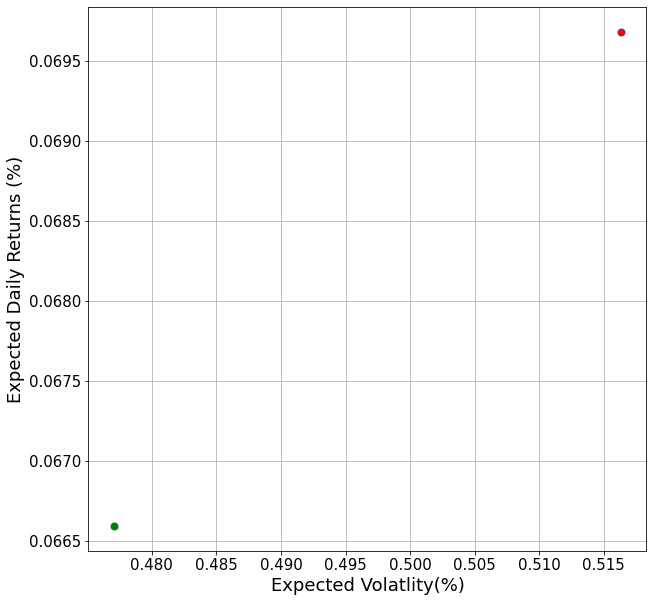

In [157]:
# Plotting portfolio 1 and 2 comparison
df_port_1_2.plot.scatter(x = "Volatility", y = "Returns", s=50, grid=True, figsize=[10,10], fontsize=15)
plt.scatter(port1_volatility,port1_return, c = 'red')
plt.scatter(port2_volatility,port2_return, c = 'green')
plt.xlabel("Expected Volatlity(%)", size=18)
plt.ylabel("Expected Daily Returns (%)", size=18)
#plt.legend(handles=["Portfolio (i)", "Portfolio (ii)"])
plt.show()

From the restuls presented in the figure, portfolio i has a higher return than that of portfolio ii, however portfolio i is riskier than portfolio ii. However the difference in return is approximately 2\%, therefore the difference is not signifanct therefore it may be adviseable to choose the less riskier portfolio. 

iii)

In [158]:
no_port = 3
portfolios = []

target_E = []
med = []

seed(10)
for i in range(no_port):
    for i in range(len(E.values)):
        start = 0.95*E.values[i]
        end = 1.05*E.values[i]

        random_E = np.random.uniform(start, end)
        target_E.append(random_E)
        median_E = median(target_E)

    med.append(median_E)

med

[0.0007060814630909971, 0.0007065200438694305, 0.0006828405668967411]

In [159]:
returns = med

volatility_opt = []
portfolios_3 = []

def minimiseMyV(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(Cov,w)))
    return V


def getReturn(w):
    w = np.array(w)
    R = np.sum(E*w)
    return R


def checkRMin(w):
    return -1*np.sum(E*w) + R 


for R in returns:
    # find opt volatility
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                    {'type':'eq', 'fun': lambda w:getReturn(w) - R})
    opt = minimize(minimiseMyV,w0, method ='SLSQP', bounds = bounds, constraints=constraints)
    
    # save my optimal volatiliy
    volatility_opt.append(opt['fun'])
    portfolios_3.append(opt.x)

portfolios_3

[array([0.000411, 0.116388, 0.115812, 0.072200, 0.106956, 0.082315,
        0.126347, 0.150695, 0.108529, 0.120347]),
 array([0.000412, 0.116388, 0.115812, 0.072200, 0.106956, 0.082314,
        0.126347, 0.150694, 0.108529, 0.120347]),
 array([0.000363, 0.116383, 0.115821, 0.072198, 0.106956, 0.082324,
        0.126361, 0.150707, 0.108532, 0.120354])]

In [160]:
full_portfolio = np.stack((portfolio_1,portfolio_2))

full_portfolio = full_portfolio.tolist()

In [161]:
portfolio_3 = []
for port in portfolios_3:
    port_3 = port.tolist()
    portfolio_3.append(port_3)

portfolio_3

[[0.00041131164125521763,
  0.11638798120354014,
  0.11581208428234664,
  0.07219973726821448,
  0.10695562912676912,
  0.08231456480552427,
  0.12634745793745877,
  0.1506946504838827,
  0.10852942738188917,
  0.1203471558691195],
 [0.0004122251243000454,
  0.11638807076861274,
  0.11581191764775679,
  0.07219976965062692,
  0.10695561304523425,
  0.08231438063851203,
  0.12634719303159506,
  0.15069442369527433,
  0.10852937240045328,
  0.12034703399763456],
 [0.0003629049906756684,
  0.11638321234179091,
  0.11582091836362503,
  0.07219804314398356,
  0.10695645111655944,
  0.0823243644977536,
  0.1263614923387541,
  0.15070665348430604,
  0.10853228118257191,
  0.12035367853997969]]

In [162]:
merged_portfolio = [full_portfolio, portfolio_3]
merged_portfolio

[[[0.0005469944698055747,
   0.18420463659893094,
   0.15937623242948873,
   8.653361931232768e-11,
   0.020036871052306778,
   2.0187724231500716e-10,
   0.24106905695915293,
   0.2069677565670518,
   0.06722317638398465,
   0.12057527525086774],
  [0.00034755819847091514,
   0.11638170231161682,
   0.11582371787322115,
   0.07219750586189501,
   0.10695671229741278,
   0.08232746973791787,
   0.12636594168942036,
   0.1507104576969088,
   0.10853318708896319,
   0.12035574724417318]],
 [[0.00041131164125521763,
   0.11638798120354014,
   0.11581208428234664,
   0.07219973726821448,
   0.10695562912676912,
   0.08231456480552427,
   0.12634745793745877,
   0.1506946504838827,
   0.10852942738188917,
   0.1203471558691195],
  [0.0004122251243000454,
   0.11638807076861274,
   0.11581191764775679,
   0.07219976965062692,
   0.10695561304523425,
   0.08231438063851203,
   0.12634719303159506,
   0.15069442369527433,
   0.10852937240045328,
   0.12034703399763456],
  [0.000362904990675668

In [163]:
final_portfolios = []

for sublist in merged_portfolio:
    for item in sublist:
        final_portfolios.append(item)
        
final_portfolios

[[0.0005469944698055747,
  0.18420463659893094,
  0.15937623242948873,
  8.653361931232768e-11,
  0.020036871052306778,
  2.0187724231500716e-10,
  0.24106905695915293,
  0.2069677565670518,
  0.06722317638398465,
  0.12057527525086774],
 [0.00034755819847091514,
  0.11638170231161682,
  0.11582371787322115,
  0.07219750586189501,
  0.10695671229741278,
  0.08232746973791787,
  0.12636594168942036,
  0.1507104576969088,
  0.10853318708896319,
  0.12035574724417318],
 [0.00041131164125521763,
  0.11638798120354014,
  0.11581208428234664,
  0.07219973726821448,
  0.10695562912676912,
  0.08231456480552427,
  0.12634745793745877,
  0.1506946504838827,
  0.10852942738188917,
  0.1203471558691195],
 [0.0004122251243000454,
  0.11638807076861274,
  0.11581191764775679,
  0.07219976965062692,
  0.10695561304523425,
  0.08231438063851203,
  0.12634719303159506,
  0.15069442369527433,
  0.10852937240045328,
  0.12034703399763456],
 [0.0003629049906756684,
  0.11638321234179091,
  0.115820918363

In [164]:
df_portfolios = pd.DataFrame(final_portfolios)
df_portfolios*100

,0,1,2,3,4,5,6,7,8,9
0,0.0547,18.4205,15.9376,0.0000,2.0037,0.0000,24.1069,20.6968,6.7223,12.0575
1,0.0348,11.6382,11.5824,7.2198,10.6957,8.2327,12.6366,15.0710,10.8533,12.0356
2,0.0411,11.6388,11.5812,7.2200,10.6956,8.2315,12.6347,15.0695,10.8529,12.0347
3,0.0412,11.6388,11.5812,7.2200,10.6956,8.2314,12.6347,15.0694,10.8529,12.0347
4,0.0363,11.6383,11.5821,7.2198,10.6956,8.2324,12.6361,15.0707,10.8532,12.0354


In [165]:
df_portfolios.mean()*100

0    0.0416
1   12.9949
2   12.4529
3    5.7759
4    8.9572
5    6.5856
6   14.9298
7   16.1955
8   10.0269
9   12.0396
dtype: float64

In [166]:
w_avg = df_portfolios.mean().values
merged_return = np.sum(E*w_avg)
merged_return

0.0006935408781185112

In [167]:
merged_volatility = np.sqrt(np.dot(w_avg.T, np.dot(Cov,w_avg)))
merged_volatility

0.4786845513771256

In [168]:
portfolio3_stats = [merged_return*100, merged_volatility]
portfolio3_stats

[0.06935408781185111, 0.4786845513771256]

In [169]:
# joining the different portfolios

df_final_comp = pd.DataFrame()
df_final_comp["Portfolio (i)"]  = portfolio1_stats
df_final_comp["Portfolio (ii)"] = portfolio2_stats
df_final_comp["Portfolio (iii)"] = portfolio3_stats


df_final_comp

,Portfolio (i),Portfolio (ii),Portfolio (iii)
0,0.0697,0.0666,0.0694
1,0.5163,0.4771,0.4787


In [170]:
df_transposed = df_final_comp.T
df_transposed

,0,1
Portfolio (i),0.0697,0.5163
Portfolio (ii),0.0666,0.4771
Portfolio (iii),0.0694,0.4787


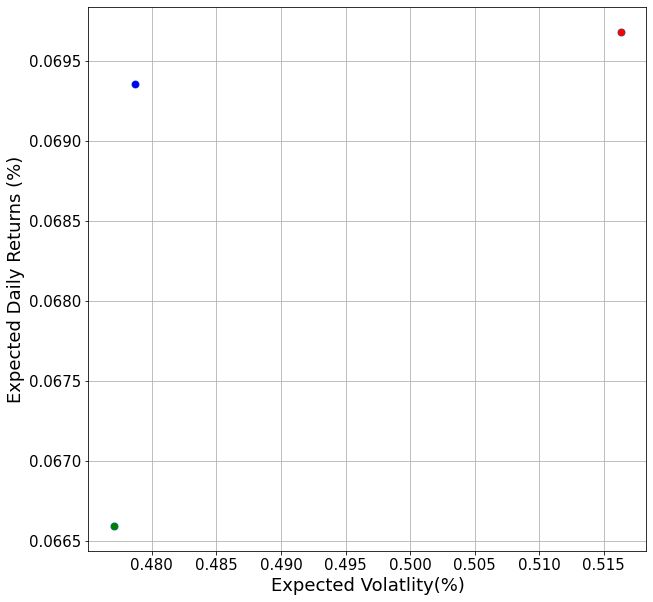

In [171]:
df_transposed.plot.scatter(x = df_transposed.columns[1], y = df_transposed.columns[0], s=50, grid=True, figsize=[10,10], fontsize=15)
plt.scatter(port1_volatility,port1_return, c = 'red')
plt.scatter(port2_volatility,port2_return, c = 'green')
plt.scatter(merged_volatility, merged_return*100, c = 'blue')
plt.xlabel("Expected Volatlity(%)", size=18)
plt.ylabel("Expected Daily Returns (%)", size=18)
#plt.legend(handles=["Portfolio (i)", "Portfolio (ii)"])
plt.show()

Comparing the three portfolios found in Ex 8.7, it is clear that the third portfolio iii is the best performing, given it has a higher return than portfolio ii and is less riskier than portfolio 1. Therefore, it is a clear trade off between return and risk. It would be adviseable to consider this portfolio as the optimal between the three. 

Conclusions

In [172]:
# Determining the optimum portfolio through iteration

no_Stocks = len(df_returns.columns)
no_Portfolios = 5000

PE = []
weight = np.zeros((no_Portfolios, no_Stocks))
expected_Returns = np.zeros(no_Portfolios) # For each portfolio
expected_Volatility = np.zeros(no_Portfolios) # For each portfolio

for k in range(no_Portfolios):
    # generate random weight vector
    w = np.array(np.random.random(no_Stocks))
    w = w / np.sum(w)
    weight[k,:] = w

    # Expected Return
    expected_Returns[k] = np.sum(E * w)

    # Expected volatility 
    expected_Volatility[k] = np.sqrt(np.dot(w.T, np.dot(Cov_log,w)))

In [173]:
# Finding the portfolio with minimum variance aka volatility

minVar = expected_Volatility.argmin()
weight[minVar]

array([0.038207, 0.120193, 0.103436, 0.093800, 0.092117, 0.080023,
       0.128508, 0.121709, 0.079603, 0.142403])

In [174]:
weight[minVar]*100

array([3.820734, 12.019288, 10.343620, 9.380038, 9.211718, 8.002339,
       12.850782, 12.170892, 7.960329, 14.240259])

In [175]:
expected_R = np.sum(weight[minVar]*E)
expected_R

0.018883968236242006

In [176]:
df_iter = pd.DataFrame()
df_iter["Expected Vol"] = expected_Volatility
df_iter["Expected Return"] = expected_Returns
df_iter

,Expected Vol,Expected Return
0,0.5230,0.0506
1,0.4887,0.0356
2,0.5290,0.0470
3,0.5711,0.0296
4,0.5193,0.0092
...,...,...
4995,0.5266,0.0606
4996,0.5242,0.0381
4997,0.5306,0.0670
4998,0.5237,0.0667


In [177]:
expected_Volatility[minVar]

0.4757332115420978

In [178]:
expected_Returns[minVar]

0.018883968236242006

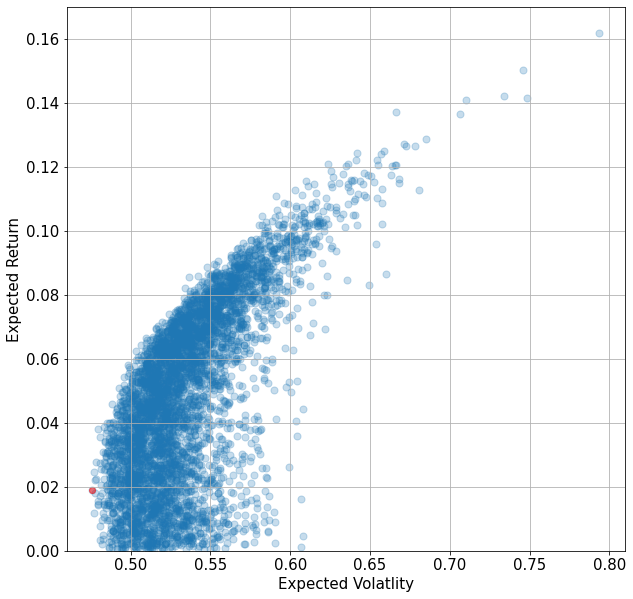

In [179]:
# Plot Returns vs Volatility
df_iter.plot.scatter(x = "Expected Vol", y= "Expected Return", marker='o', alpha=0.25, s=50, grid=True, figsize=[10,10], fontsize=15)

#plt.scatter(expected_Volatility,expected_Returns)
plt.scatter(expected_Volatility[minVar], expected_Returns[minVar], c='red', alpha=0.5)
#plt.scatter(port1_volatility,port1_return, c = 'red')
#plt.scatter(port2_volatility,port2_return, c = 'green')
#plt.scatter(merged_volatility, merged_return*100, c = 'blue')
plt.xlabel("Expected Volatlity")
plt.ylabel("Expected Return")
plt.ylim(ymin=0)

plt.show()